In [7]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

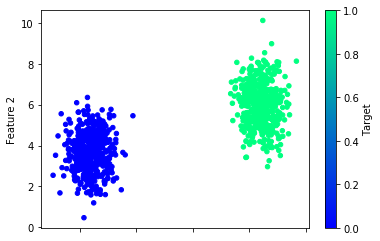

In [8]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [9]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
from tensorflow import keras

In [20]:
from tensorflow.keras import Sequential

In [22]:
# Create the Keras Sequential model
nn_model = Sequential()

In [28]:
# Add our first Dense layer, including the input layer
nn_model.add(keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [29]:
# Add the output layer that uses a probability activation function
nn_model.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [30]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 4s 5ms/sample - loss: 0.6952 - accuracy: 0.4947
Epoch 2/100
750/750 [==============================] - 0s 33us/sample - loss: 0.6939 - accuracy: 0.5067
Epoch 3/100
750/750 [==============================] - 0s 39us/sample - loss: 0.6932 - accuracy: 0.5080
Epoch 4/100
750/750 [==============================] - 0s 56us/sample - loss: 0.6926 - accuracy: 0.5640
Epoch 5/100
750/750 [==============================] - 0s 40us/sample - loss: 0.6920 - accuracy: 0.5653
Epoch 6/100
750/750 [==============================] - 0s 65us/sample - loss: 0.6907 - accuracy: 0.5960
Epoch 7/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6884 - accuracy: 0.6213
Epoch 8/100
750/750 [==============================] - 0s 37us/sample - loss: 0.6846 - accuracy: 0.6773
Epoch 9/100
750/750 [==============================] - 0s 86us/sample - loss: 0.6788 - accuracy: 0.7373
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 37us/sample - loss: 0.1106 - accuracy: 1.0000
Epoch 78/100
750/750 [==============================] - 0s 47us/sample - loss: 0.1086 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 48us/sample - loss: 0.1067 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 44us/sample - loss: 0.1049 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 47us/sample - loss: 0.1031 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 37us/sample - loss: 0.1014 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 32us/sample - loss: 0.0997 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 36us/sample - loss: 0.0980 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 37us/sample - loss: 0.0964 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 33us/samp

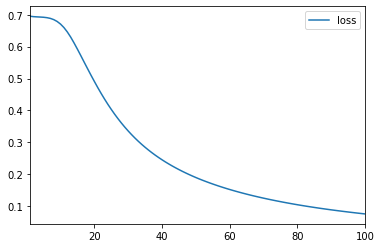

In [33]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

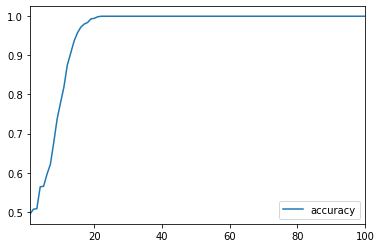

In [34]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0714 - accuracy: 1.0000
Loss: 0.07136259818077087, Accuracy: 1.0


In [36]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

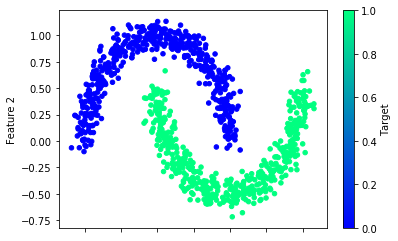

In [37]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [38]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [39]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 408us/sample - loss: 0.7630 - accuracy: 0.6240
Epoch 2/100
750/750 [==============================] - 0s 43us/sample - loss: 0.6838 - accuracy: 0.6480
Epoch 3/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6301 - accuracy: 0.6653
Epoch 4/100
750/750 [==============================] - 0s 37us/sample - loss: 0.5902 - accuracy: 0.6773
Epoch 5/100
750/750 [==============================] - 0s 39us/sample - loss: 0.5621 - accuracy: 0.6880
Epoch 6/100
750/750 [==============================] - 0s 39us/sample - loss: 0.5399 - accuracy: 0.6973
Epoch 7/100
750/750 [==============================] - 0s 37us/sample - loss: 0.5216 - accuracy: 0.7040
Epoch 8/100
750/750 [==============================] - 0s 36us/sample - loss: 0.5070 - accuracy: 0.7093
Epoch 9/100
750/750 [==============================] - 0s 37us/sample - loss: 0.4937 - accuracy: 0.7160
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 39us/sample - loss: 0.2720 - accuracy: 0.8787
Epoch 79/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2713 - accuracy: 0.8813
Epoch 80/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2706 - accuracy: 0.8813
Epoch 81/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2700 - accuracy: 0.8827
Epoch 82/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2694 - accuracy: 0.8853
Epoch 83/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2688 - accuracy: 0.8880
Epoch 84/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2682 - accuracy: 0.8880
Epoch 85/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2677 - accuracy: 0.8880
Epoch 86/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2670 - accuracy: 0.8880
Epoch 87/100
750/750 [==============================] - 0s 39us/samp

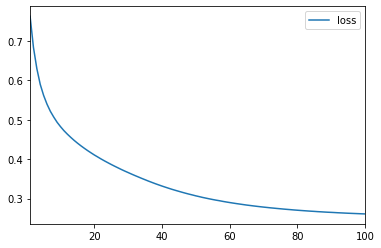

In [40]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

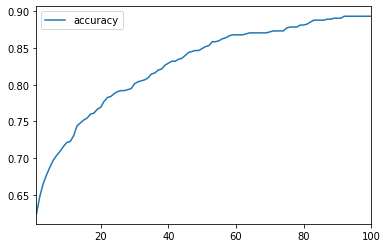

In [41]:
# Plot the loss
history_df.plot(y="accuracy")

In [42]:
# Generate our new Sequential model
new_model = keras.models.Sequential()

In [45]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [46]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 733us/sample - loss: 0.6763 - accuracy: 0.5867
Epoch 2/100
750/750 [==============================] - 0s 39us/sample - loss: 0.6428 - accuracy: 0.6147
Epoch 3/100
750/750 [==============================] - 0s 37us/sample - loss: 0.6142 - accuracy: 0.6547
Epoch 4/100
750/750 [==============================] - 0s 40us/sample - loss: 0.5876 - accuracy: 0.7013
Epoch 5/100
750/750 [==============================] - 0s 40us/sample - loss: 0.5619 - accuracy: 0.7653
Epoch 6/100
750/750 [==============================] - 0s 37us/sample - loss: 0.5373 - accuracy: 0.8307
Epoch 7/100
750/750 [==============================] - 0s 41us/sample - loss: 0.5134 - accuracy: 0.8520
Epoch 8/100
750/750 [==============================] - 0s 37us/sample - loss: 0.4910 - accuracy: 0.8680
Epoch 9/100
750/750 [==============================] - 0s 43us/sample - loss: 0.4695 - accuracy: 0.8773
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 40us/sample - loss: 0.2349 - accuracy: 0.8973
Epoch 79/100
750/750 [==============================] - 0s 49us/sample - loss: 0.2344 - accuracy: 0.8973
Epoch 80/100
750/750 [==============================] - 0s 48us/sample - loss: 0.2341 - accuracy: 0.8987
Epoch 81/100
750/750 [==============================] - 0s 51us/sample - loss: 0.2339 - accuracy: 0.9000
Epoch 82/100
750/750 [==============================] - 0s 47us/sample - loss: 0.2335 - accuracy: 0.9000
Epoch 83/100
750/750 [==============================] - 0s 44us/sample - loss: 0.2331 - accuracy: 0.9000
Epoch 84/100
750/750 [==============================] - 0s 44us/sample - loss: 0.2329 - accuracy: 0.9013
Epoch 85/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2325 - accuracy: 0.9013
Epoch 86/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2323 - accuracy: 0.9013
Epoch 87/100
750/750 [==============================] - 0s 40us/samp